In [69]:
import math
import numpy as np
import sys
import os
import uproot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from scipy import stats, optimize
import pylandau
from pathlib import Path

In [390]:
# from funs import *

plt.rcParams["font.size"]=12
plt.rcParams["axes.labelsize"]=12
plt.rcParams["figure.dpi"]=200
plt.rcParams['figure.figsize'] = [6, 5.5]

In [72]:
%%capture

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

In [6]:
### get data ###

inFileName = "../Root_outputs/FrontRPCAnalysis.root"
outFileName = "{}.txt".format(Path(inFileName).stem)
file = uproot.open(inFileName)

# file.keys()
treeFront = file['treeFrontCRV']
treeBack = file['treeBackCRV']
treeFront_arr = treeFront.arrays()
treeBack_arr = treeBack.arrays()

In [73]:
### get data ###

inFileName = "../Root_outputs/CRVAnalysis.root"
outFileName = "{}.txt".format(Path(inFileName).stem)
file = uproot.open(inFileName)

# file.keys()
treeFront = file['treeFrontCRV']
treeBack = file['treeBackCRV']
treeFront_arr = treeFront.arrays()
treeBack_arr = treeBack.arrays()

In [74]:
IsFirstHit = treeFront_arr.IsFirstHit
RPCweights = treeFront_arr.RpcSensitivity

HitT = np.array(treeFront_arr.PositionT)[IsFirstHit==True]
HitX = np.array(treeFront_arr.PositionX)[IsFirstHit==True]
HitY = np.array(treeFront_arr.PositionY)[IsFirstHit==True]
HitZ = np.array(treeFront_arr.PositionZ)[IsFirstHit==True]

In [282]:
len(treeFront_arr.PositionT), len(HitT)

(2319237, 163669)

In [81]:
# plt.plot(HitX, HitY, '.')

In [168]:
def moduleBounds(xmin, xmax, ymin, ymax, L, l, n=100):

    ### module 1
    x11 = np.linspace(xmin, xmin+L, n)
    y11 = np.linspace(ymax, ymax, n)
    x12 = np.linspace(xmin+L, xmin+L, n)
    y12 = np.linspace(ymax, ymax-l, n)
    x13 = x11
    y13 = np.linspace(ymax-l, ymax-l, n)
    x14 = np.linspace(xmin, xmin, n)
    y14 = y12
    
    xs = np.array([x11, x12, x13, x14])
    ys = np.array([y11, y12, y13, y14])

    return xs.flatten(), ys.flatten()


def fourModuleBounds(xmin, xmax, ymin, ymax, L, l, n=100):

    ### module 1
    xs1, ys1 = moduleBounds(xmin, xmax, ymin, ymax, L, l, n)

    ### module 2 
    xs2 = xs1*np.cos(-np.pi/2) + ys1*np.sin(-np.pi/2)
    ys2 = -xs1*np.sin(-np.pi/2) + ys1*np.cos(-np.pi/2)

    ### module 3
    xs3 = xs1 + l
    ys3 = ys1 - L
    
    ### module 4
    xs4 = xs2 + L
    ys4 = ys2 + l
    
    return xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4


def moduleStrips(xmin, xmax, ymin, ymax, L, l, nstrips, n=100):

    dL = L/nstrips
    xs = []
    ys = []
    ### module 1
    for i in range(nstrips):
        x11 = np.linspace(xmin + i*dL, xmin + (i+1)*dL, n)
        y11 = np.linspace(ymax, ymax, n)
        x12 = np.linspace(xmin + (i+1)*dL, xmin + (i+1)*dL, n)
        y12 = np.linspace(ymax, ymax-l, n)
        x13 = x11
        y13 = np.linspace(ymax-l, ymax-l, n)
        x14 = np.linspace(xmin + i*dL, xmin + i*dL, n)
        y14 = y12
        xs.append([x11, x12, x13, x14])
        ys.append([y11, y12, y13, y14])
    
    return np.array(xs).flatten(), np.array(ys).flatten()


def fourModuleStrips(xmin, xmax, ymin, ymax, L, l, nstrips, n=100):

    ### module 1
    xs1, ys1 = moduleStrips(xmin, xmax, ymin, ymax, L, l, nstrips, n)

    ### module 2 
    xs2 = xs1*np.cos(-np.pi/2) + ys1*np.sin(-np.pi/2)
    ys2 = -xs1*np.sin(-np.pi/2) + ys1*np.cos(-np.pi/2)

    ### module 3
    xs3 = xs1 + l
    ys3 = ys1 - L
    
    ### module 4
    xs4 = xs2 + L
    ys4 = ys2 + l
    
    return xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4



2800 1500


Text(0, 0.5, 'z (mm)')

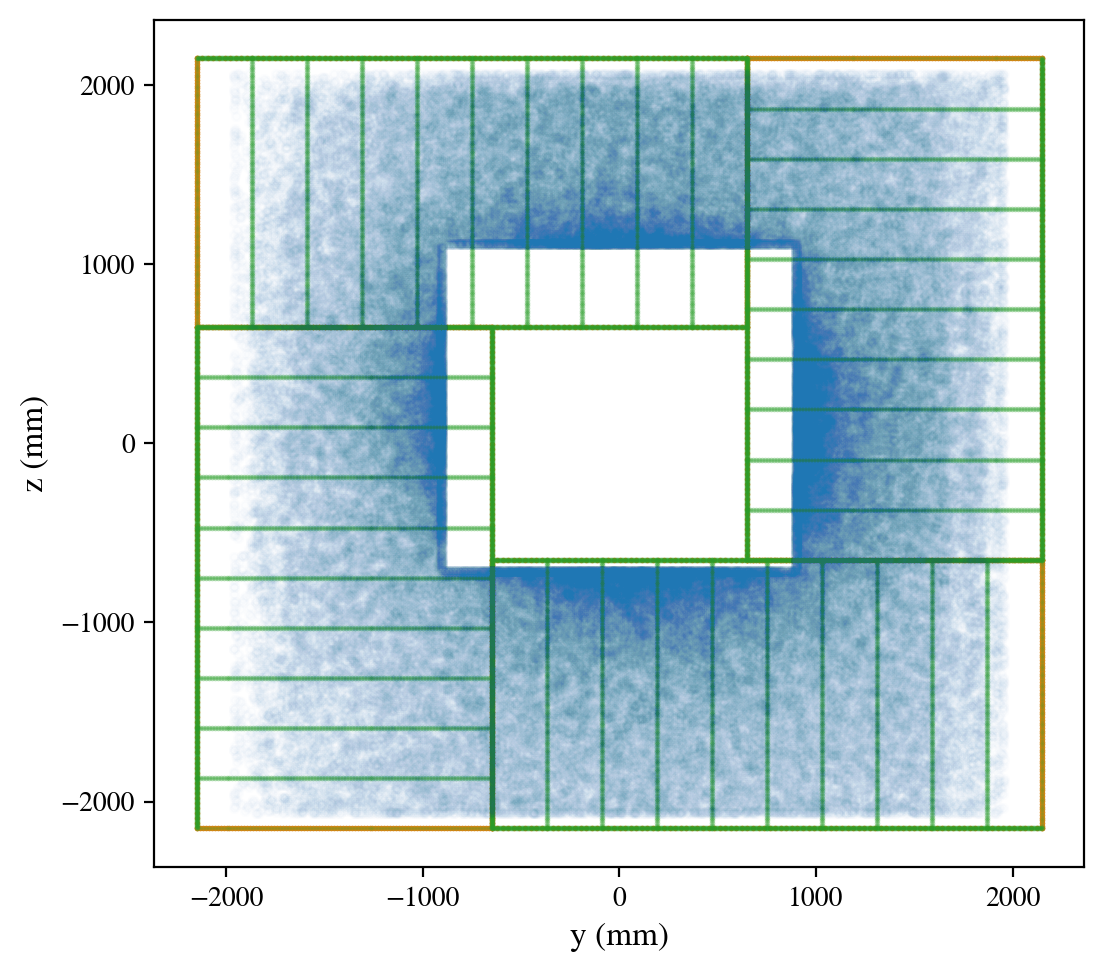

In [170]:
xmax = 2150
xmin = -2150
ymax = 2150
ymin = -2150

nstrips = 10

L = 2800
l = (xmax-xmin)-L
print(L, l)

# xs, ys = moduleBounds(xmin, xmax, ymin, ymax, L, l, n=100)
xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4 = fourModuleBounds(xmin, xmax, ymin, ymax, L, l, n=100)

# xs01, ys01 = moduleStrips(xmin, xmax, ymin, ymax, L, l, nstrips, n=100)
xs01, ys01, xs02, ys02, xs03, ys03, xs04, ys04 = fourModuleStrips(xmin, xmax, ymin, ymax, L, l, nstrips, n=100)

plt.plot(HitY, HitZ, '.', alpha=0.01)
# plt.scatter(xs, ys, c='tab:orange', s=1)
plt.scatter(xs1, ys1, c='tab:orange', s=1)
plt.scatter(xs2, ys2, c='tab:orange', s=1)
plt.scatter(xs3, ys3, c='tab:orange', s=1)
plt.scatter(xs4, ys4, c='tab:orange', s=1)

plt.scatter(xs01, ys01, c='tab:green', alpha=0.2, s=1)
plt.scatter(xs02, ys02, c='tab:green', alpha=0.2, s=1)
plt.scatter(xs03, ys03, c='tab:green', alpha=0.2, s=1)
plt.scatter(xs04, ys04, c='tab:green', alpha=0.2, s=1)

plt.xlabel("y (mm)")
plt.ylabel("z (mm)")

In [280]:
len(HitT)

163669

In [441]:
class ModuleGeo1:

        def __init__(self, nstrips=10, xmin=-2150, xmax=2150, ymin=-2150, ymax=2150, L=2800, orientation='1'):
            self.nstrips = nstrips
            self.Xmax = xmax
            self.Xmin = xmin
            self.Ymax = ymax
            self.Ymin = ymin
            self.L = L
            self.l = (self.Xmax-self.Xmin) - self.L
            if orientation=='1':
                self.pitch = self.L/self.nstrips
            elif orientation=='2':
                self.pitch = self.l/self.nstrips
            self.makeModules()
            self.makeModuleSet()

        def makeModule(self):
            moduleXmax = self.Xmin + self.L
            moduleXmin = self.Xmin
            moduleYmax = self.Ymax
            moduleYmin = self.Ymax - self.l
            return np.array([moduleXmin, moduleXmax]), np.array([moduleYmin, moduleYmax])

        def makeModules(self):
            ### module 1
            self.xBounds1, self.yBounds1 = self.makeModule()
            ### module 2 
            xBounds2 = self.xBounds1*np.cos(-np.pi/2) + self.yBounds1*np.sin(-np.pi/2)
            yBounds2 = -self.xBounds1*np.sin(-np.pi/2) + self.yBounds1*np.cos(-np.pi/2)
            self.xBounds2 = np.array([min(xBounds2), max(xBounds2)])
            self.yBounds2 = np.array([min(yBounds2), max(yBounds2)])
            ### module 3
            self.xBounds3 = self.xBounds1 + self.l
            self.yBounds3 = self.yBounds1 - self.L
            ### module 4
            self.xBounds4 = self.xBounds2 + self.L
            self.yBounds4 = self.yBounds2 + self.l

        def makeStrips(self):
            dL = self.L/self.nstrips
            xStripsBounds = {} ## key: strip index, entry: strip bounds (xmin, xmax)
            yStripsBounds = {} ## key: strip index, entry: strip bounds (ymin, ymax)
            for i in range(self.nstrips):
                xStripsBounds[i] = np.array([self.Xmin + i*dL, self.Xmin + (i+1)*dL])
                yStripsBounds[i] = np.array([self.Ymax - self.l, self.Ymax])
            # print("done")
            return xStripsBounds, yStripsBounds
        
        def makeModuleSet(self):
            ### module 1
            self.xStripsBounds1, self.yStripsBounds1 = self.makeStrips()
            ### module 2
            xStripsBounds2 = { i : self.xStripsBounds1[i]*np.cos(-np.pi/2) + self.yStripsBounds1[i]*np.sin(-np.pi/2) for i in range(self.nstrips) }
            yStripsBounds2 = { i : -self.xStripsBounds1[i]*np.sin(-np.pi/2) + self.yStripsBounds1[i]*np.cos(-np.pi/2) for i in range(self.nstrips) }
            self.xStripsBounds2 = { i : np.array([min(xStripsBounds2[i]), max(xStripsBounds2[i])]) for i in range(self.nstrips) }
            self.yStripsBounds2 = { i : np.array([min(yStripsBounds2[i]), max(yStripsBounds2[i])]) for i in range(self.nstrips) }
            # ### module 3
            self.xStripsBounds3 = { i : self.xStripsBounds1[i] + self.l for i in range(self.nstrips) }
            self.yStripsBounds3 = { i : self.yStripsBounds1[i] - self.L for i in range(self.nstrips) }
            # ### module 4
            self.xStripsBounds4 = { i : self.xStripsBounds2[i] + self.L for i in range(self.nstrips) }
            self.yStripsBounds4 = { i : self.yStripsBounds2[i] + self.l for i in range(self.nstrips) }
            # print("done")


In [442]:
geo1 = ModuleGeo1()

(-2200.0, 2200.0)

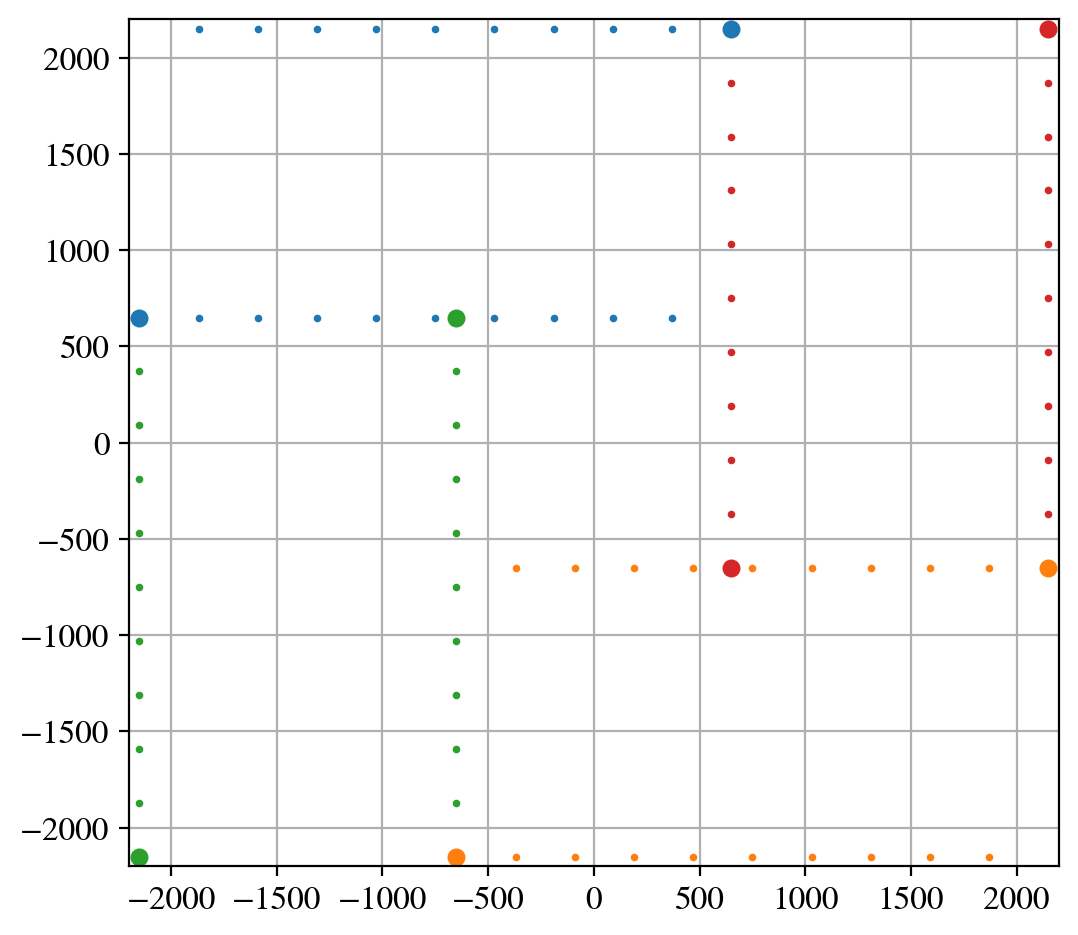

In [443]:
nstrips = 10

for i in range(nstrips):
    plt.scatter(geo1.xStripsBounds1[i], geo1.yStripsBounds1[i], s=3, c='tab:blue')
    plt.scatter(geo1.xStripsBounds2[i], geo1.yStripsBounds2[i], s=3, c='tab:green')
    plt.scatter(geo1.xStripsBounds3[i], geo1.yStripsBounds3[i], s=3, c='tab:orange')
    plt.scatter(geo1.xStripsBounds4[i], geo1.yStripsBounds4[i], s=3, c='tab:red')

plt.scatter(geo1.xBounds1, geo1.yBounds1, s=30, c='tab:blue')
plt.scatter(geo1.xBounds2, geo1.yBounds2, s=30, c='tab:green')
plt.scatter(geo1.xBounds3, geo1.yBounds3, s=30, c='tab:orange')
plt.scatter(geo1.xBounds4, geo1.yBounds4, s=30, c='tab:red')

plt.grid()
plt.xlim(-2200, 2200)
plt.ylim(-2200, 2200)

In [444]:
geo1.xBounds1

array([-2150,   650])

In [445]:
class CRVHitMap:

    def __init__(self, inFilePath, mode='front'):
        self.nPOT = 99995000
        self.outFileName = "{}.txt".format(Path(inFilePath).stem)
        self.file = uproot.open(inFilePath)
        self.fileKeys = self.file.keys()
        self.treeFront = self.file['treeFrontCRV']
        self.treeBack = self.file['treeBackCRV']
        self.treeFront_arr = self.treeFront.arrays()
        self.treeBack_arr = self.treeBack.arrays()
        self.getHitPos(mode)
        # self.getGeometry()
        
    def getHitPos(self, mode='front'):
        if mode=='front':
            self.IsFirstHit = treeFront_arr.IsFirstHit
            self.RPCweights = treeFront_arr.RpcSensitivity
            self.HitT = np.array(treeFront_arr.PositionT)[self.IsFirstHit==True]
            self.HitX = np.array(treeFront_arr.PositionX)[self.IsFirstHit==True]
            self.HitY = np.array(treeFront_arr.PositionY)[self.IsFirstHit==True]
            self.HitZ = np.array(treeFront_arr.PositionZ)[self.IsFirstHit==True]
            self.nhits = len(self.HitT)

    def getGeometry(self, nstrips=10, L=2800, geo_type="rectangular strips 1"):
        self.geo_type = geo_type
        if geo_type=='rectangular strips 1':
            self.geometry = ModuleGeo1(nstrips=nstrips, L=L)

    def getHitsPerChannel(self):
        self.POTperSec = 2.5e12 
        self.hitRateFactor = self.POTperSec / self.nPOT
        if self.geometry==None:
           print("get geometry first")
           return 0
        if self.geo_type=='rectangular strips 1':
            nstrips = self.geometry.nstrips
            self.module1Hits = {i : 0 for i in range(nstrips)}
            self.module2Hits = {i : 0 for i in range(nstrips)}
            self.module3Hits = {i : 0 for i in range(nstrips)}
            self.module4Hits = {i : 0 for i in range(nstrips)}
            for ihit in range(self.nhits):
                # iterate over hits
                xi = self.HitY[ihit]
                yi = self.HitZ[ihit]
                weight = self.RPCweights[ihit]
                # check if hit is in module
                if self.geometry.xBounds1[0]<=xi<self.geometry.xBounds1[1] and self.geometry.yBounds1[0]<=yi<self.geometry.yBounds1[1]:
                    for i in range(nstrips):
                        # check if hit is in strip
                        if self.geometry.xStripsBounds1[i][0]<=xi<self.geometry.xStripsBounds1[i][1] and self.geometry.yStripsBounds1[i][0]<=yi<self.geometry.yStripsBounds1[i][1]:
                            self.module1Hits[i] += 1*weight*self.hitRateFactor
                # check if hit is in module
                elif self.geometry.xBounds2[0]<=xi<self.geometry.xBounds2[1] and self.geometry.yBounds2[0]<=yi<self.geometry.yBounds2[1]:
                    for i in range(nstrips):
                        # check if hit is in strip
                        if self.geometry.xStripsBounds2[i][0]<=xi<self.geometry.xStripsBounds2[i][1] and self.geometry.yStripsBounds2[i][0]<=yi<self.geometry.yStripsBounds2[i][1]:
                            self.module2Hits[i] += 1*weight*self.hitRateFactor
                # check if hit is in module
                if self.geometry.xBounds3[0]<=xi<self.geometry.xBounds3[1] and self.geometry.yBounds3[0]<=yi<self.geometry.yBounds3[1]:
                    for i in range(nstrips):
                        # check if hit is in strip
                        if self.geometry.xStripsBounds3[i][0]<=xi<self.geometry.xStripsBounds3[i][1] and self.geometry.yStripsBounds3[i][0]<=yi<self.geometry.yStripsBounds3[i][1]:
                            self.module3Hits[i] += 1*weight*self.hitRateFactor
                # check if hit is in module
                if self.geometry.xBounds4[0]<=xi<self.geometry.xBounds4[1] and self.geometry.yBounds4[0]<=yi<self.geometry.yBounds4[1]:
                    for i in range(nstrips):
                        # check if hit is in strip
                        if self.geometry.xStripsBounds4[i][0]<=xi<self.geometry.xStripsBounds4[i][1] and self.geometry.yStripsBounds4[i][0]<=yi<self.geometry.yStripsBounds4[i][1]:
                            self.module4Hits[i] += 1*weight*self.hitRateFactor


In [446]:
geo1.xStripsBounds1[0]

array([-2150., -1870.])

In [476]:
frontcrv1 = CRVHitMap("../Root_outputs/FrontRPCAnalysis.root")

In [477]:
frontcrv1.getGeometry(nstrips=10)

In [478]:
frontcrv1.geometry.xStripsBounds1

{0: array([-2150., -1870.]),
 1: array([-1870., -1590.]),
 2: array([-1590., -1310.]),
 3: array([-1310., -1030.]),
 4: array([-1030.,  -750.]),
 5: array([-750., -470.]),
 6: array([-470., -190.]),
 7: array([-190.,   90.]),
 8: array([ 90., 370.]),
 9: array([370., 650.])}

In [479]:
frontcrv1.getHitsPerChannel()

In [480]:
frontcrv1.nhits

163669

In [481]:
frontcrv1.hitRateFactor

25001.250062503124

In [489]:
len(frontcrv1.HitY)

163669

In [482]:
frontcrv1.module1Hits, frontcrv1.module2Hits, frontcrv1.module3Hits, frontcrv1.module4Hits

({0: 21929.653669268224,
  1: 212405.46594881438,
  2: 423519.26637420454,
  3: 544049.625099148,
  4: 721573.2547944341,
  5: 674441.7950993866,
  6: 748635.4211247818,
  7: 828778.8754681543,
  8: 883206.0843075917,
  9: 724965.2695513098},
 {0: 200377.71159078568,
  1: 328145.2672792162,
  2: 348004.9644625656,
  3: 393448.1802860735,
  4: 478114.29067094636,
  5: 454475.0385936223,
  6: 474729.53218887444,
  7: 629183.3465729433,
  8: 601699.2244136074,
  9: 564038.6263439779},
 {0: 783447.0145093874,
  1: 863814.809169353,
  2: 1042955.4025484566,
  3: 1045930.4415918745,
  4: 968735.8472229136,
  5: 794733.9671118049,
  6: 620243.0335473114,
  7: 477600.6641966839,
  8: 346118.0204516703,
  9: 43147.62833706412},
 {0: 744076.6513424049,
  1: 842636.8843053787,
  2: 980435.2704084788,
  3: 955629.1558353435,
  4: 699107.8591537492,
  5: 597895.9115388129,
  6: 644984.9182497212,
  7: 573621.1220280776,
  8: 501558.60504797276,
  9: 305099.6219717046})

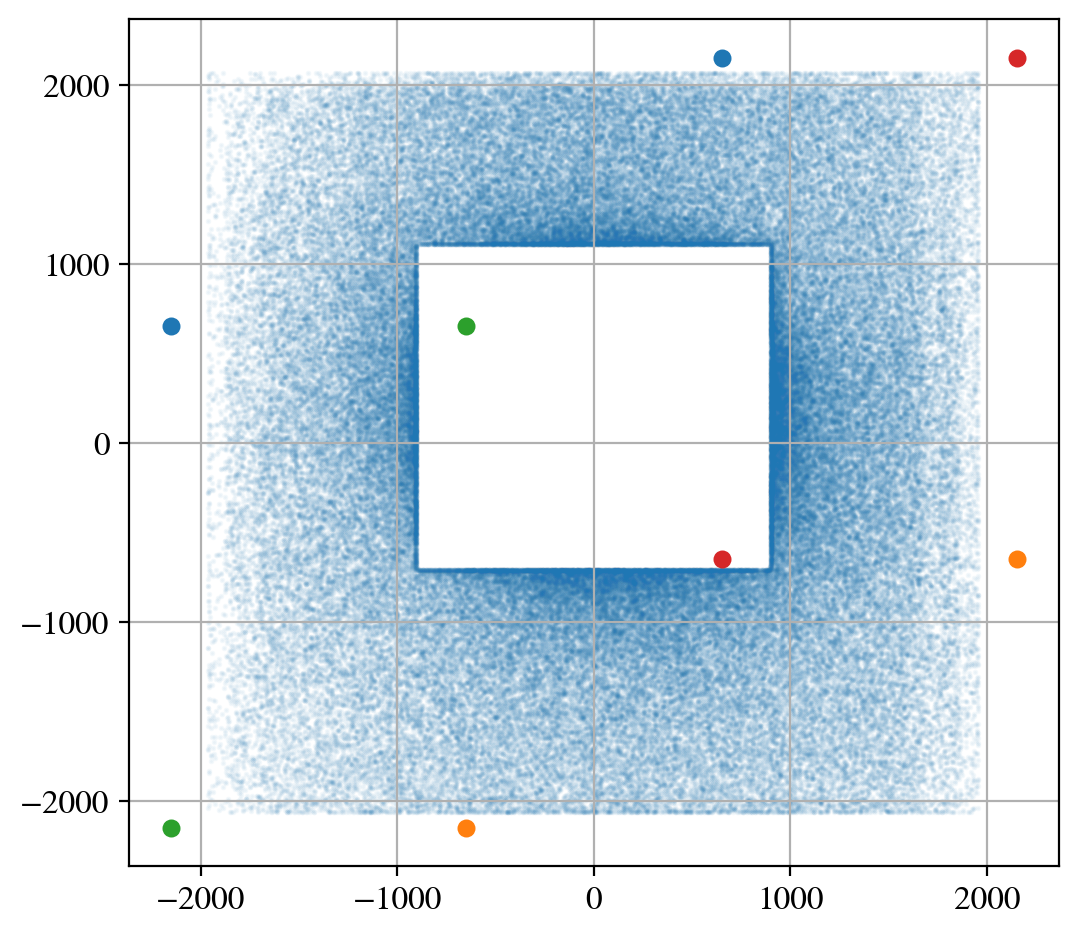

In [483]:
plt.scatter(frontcrv1.HitY, frontcrv1.HitZ, s=1, alpha=0.05)
plt.scatter(frontcrv1.geometry.xBounds1, frontcrv1.geometry.yBounds1, s=30, c='tab:blue')
plt.scatter(frontcrv1.geometry.xBounds2, frontcrv1.geometry.yBounds2, s=30, c='tab:green')
plt.scatter(frontcrv1.geometry.xBounds3, frontcrv1.geometry.yBounds3, s=30, c='tab:orange')
plt.scatter(frontcrv1.geometry.xBounds4, frontcrv1.geometry.yBounds4, s=30, c='tab:red')
plt.grid()

In [484]:
print(frontcrv1.module1Hits)

{0: 21929.653669268224, 1: 212405.46594881438, 2: 423519.26637420454, 3: 544049.625099148, 4: 721573.2547944341, 5: 674441.7950993866, 6: 748635.4211247818, 7: 828778.8754681543, 8: 883206.0843075917, 9: 724965.2695513098}


In [485]:
print(frontcrv1.geometry.xStripsBounds1)
print(frontcrv1.geometry.yStripsBounds1)

{0: array([-2150., -1870.]), 1: array([-1870., -1590.]), 2: array([-1590., -1310.]), 3: array([-1310., -1030.]), 4: array([-1030.,  -750.]), 5: array([-750., -470.]), 6: array([-470., -190.]), 7: array([-190.,   90.]), 8: array([ 90., 370.]), 9: array([370., 650.])}
{0: array([ 650, 2150]), 1: array([ 650, 2150]), 2: array([ 650, 2150]), 3: array([ 650, 2150]), 4: array([ 650, 2150]), 5: array([ 650, 2150]), 6: array([ 650, 2150]), 7: array([ 650, 2150]), 8: array([ 650, 2150]), 9: array([ 650, 2150])}


In [486]:
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def plot_strip_hitmap(crvmap, modules=[1, 2, 3, 4], figsize=(8, 6), plotHits=True):
    fig, ax = plt.subplots(figsize=figsize)

    # Collect all hit values for normalization
    all_hits = []
    for imod in modules:
        hits = getattr(crvmap, f"module{imod}Hits")
        all_hits.extend(hits.values())

    vmax = max(all_hits) if all_hits else 1e-6
    norm = mcolors.Normalize(vmin=0, vmax=vmax)
    cmap = plt.cm.YlOrRd

    for imod in modules:
        hits = getattr(crvmap, f"module{imod}Hits")
        xbounds_dict = getattr(crvmap.geometry, f"xStripsBounds{imod}")
        ybounds_dict = getattr(crvmap.geometry, f"yStripsBounds{imod}")
        
        for i in range(len(hits)):
            if i not in xbounds_dict or i not in ybounds_dict:
                continue

            x0, x1 = xbounds_dict[i].tolist()
            y0, y1 = ybounds_dict[i].tolist()
            val = hits[i]
            color = cmap(norm(val))

            rect = Rectangle((x0, y0), x1 - x0, y1 - y0,
                             facecolor=color, edgecolor='black', linewidth=0.5)
            ax.add_patch(rect)

    # Set axis limits explicitly
    all_x = []
    all_y = []
    for imod in modules:
        xbounds_dict = getattr(crvmap.geometry, f"xStripsBounds{imod}")
        ybounds_dict = getattr(crvmap.geometry, f"yStripsBounds{imod}")
        for i in range(len(xbounds_dict)):
            x0, x1 = xbounds_dict[i].tolist()
            y0, y1 = ybounds_dict[i].tolist()
            all_x.extend([x0, x1])
            all_y.extend([y0, y1])

    ax.set_xlim(min(all_x) - 100, max(all_x) + 100)
    ax.set_ylim(min(all_y) - 100, max(all_y) + 100)

    ax.set_xlabel("Y (mm)", size=14)
    ax.set_ylabel("Z (mm)", size=14)
    ax.set_aspect('equal')
    ax.set_title("Front CRV RPCs: rectangular strips")
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Weighted Hit Rate (Hz/strip)")
    cb.ax.yaxis.label.set_size(14)

    if plotHits==True:
        ax.scatter(crvmap.HitY, crvmap.HitZ, s=1, alpha=0.1)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [487]:
frontcrv1.geometry.xStripsBounds1

{0: array([-2150., -1870.]),
 1: array([-1870., -1590.]),
 2: array([-1590., -1310.]),
 3: array([-1310., -1030.]),
 4: array([-1030.,  -750.]),
 5: array([-750., -470.]),
 6: array([-470., -190.]),
 7: array([-190.,   90.]),
 8: array([ 90., 370.]),
 9: array([370., 650.])}

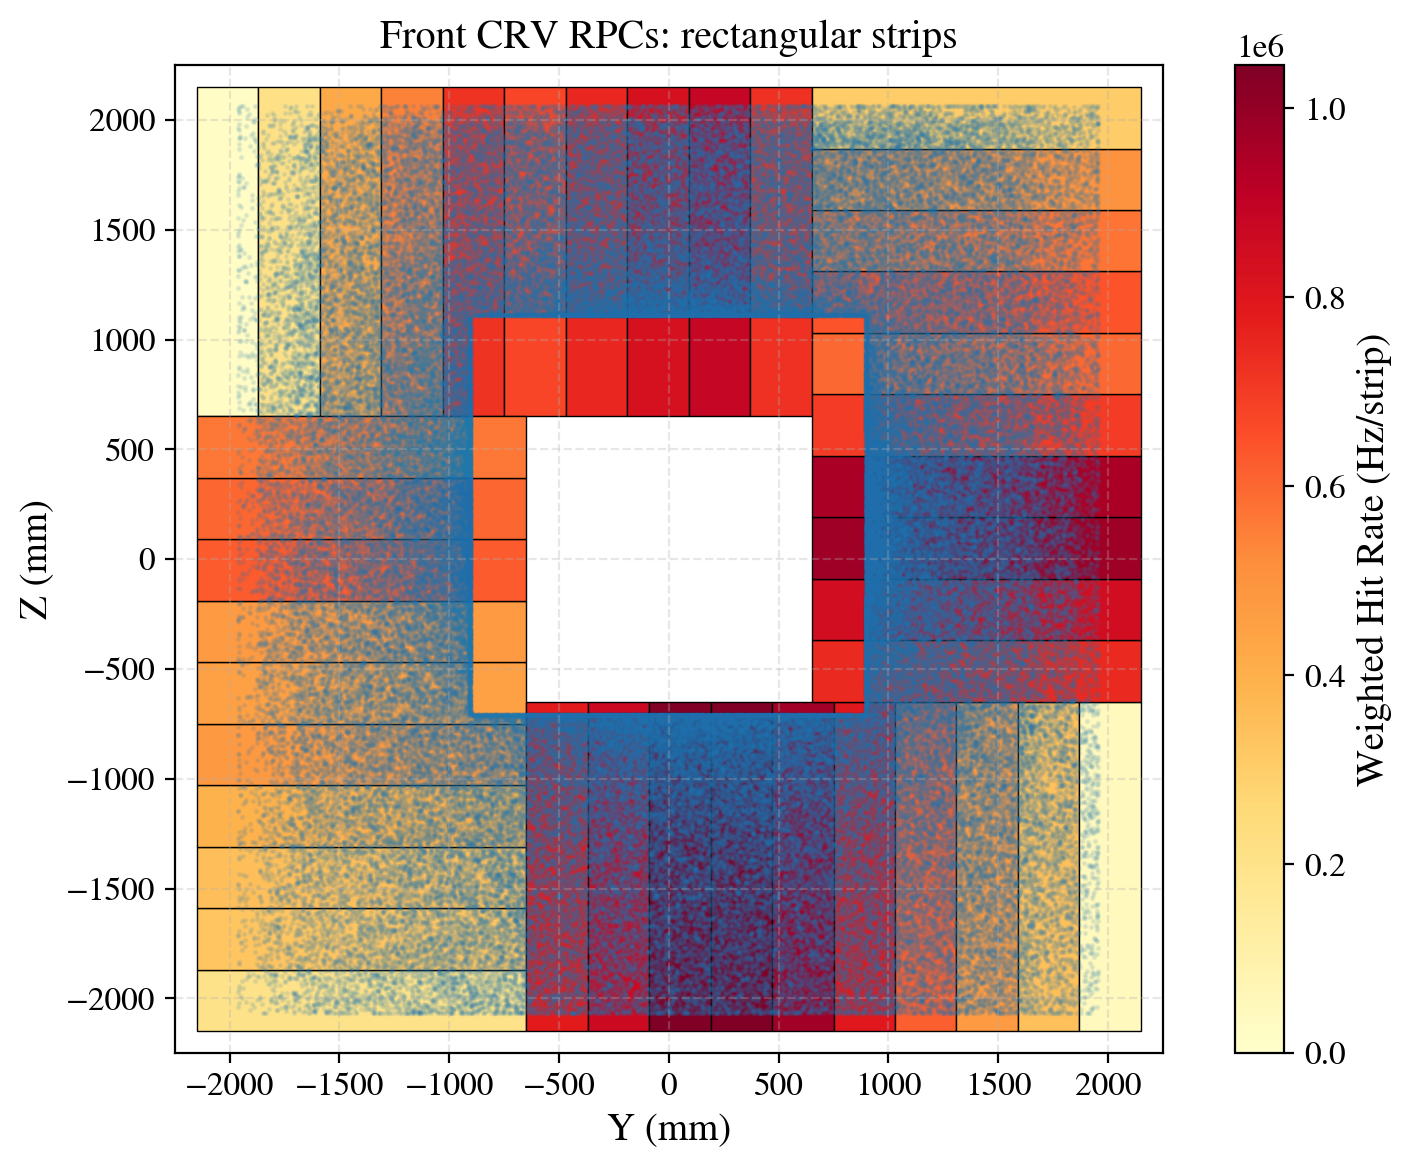

In [488]:
frontcrv1.getGeometry(nstrips=10)
frontcrv1.getHitsPerChannel()
plot_strip_hitmap(frontcrv1, plotHits=True)

In [ ]:
# x0, y0, z0 = 3806, 0, 7650  ## front CRV center / origin of CRV coord system
# XZangle = np.arctan2(3500, -600) - np.pi/2 ### front CRV angle in XZ plane

# # cartesian coordinates in CRV system
# xc = (HitX-x0)*np.cos(XZangle) + (HitZ-z0)*np.sin(XZangle)
# yc = HitY-y0
# zc = -(HitX-x0)*np.sin(XZangle) + (HitZ-z0)*np.cos(XZangle)

# # polar coordinates in CRV system
# rho = (xc**2 + yc**2)**0.5
# # irho = (iy**2 + iz**2)**0.5
# # orho = (oy**2 + oz**2)**0.5
# phi = np.arctan2(HitZ-z0, HitY-y0)
# # iphi = np.arctan2(iy, iz)
# # ophi = np.arctan2(oy, oz)

# # p2 = np.sqrt(px**2 + py**2 + pz**2)
# # ip2 = np.sqrt(ipx**2 + ipy**2 + ipz**2)
# # op2 = np.sqrt(opx**2 + opy**2 + opz**2)

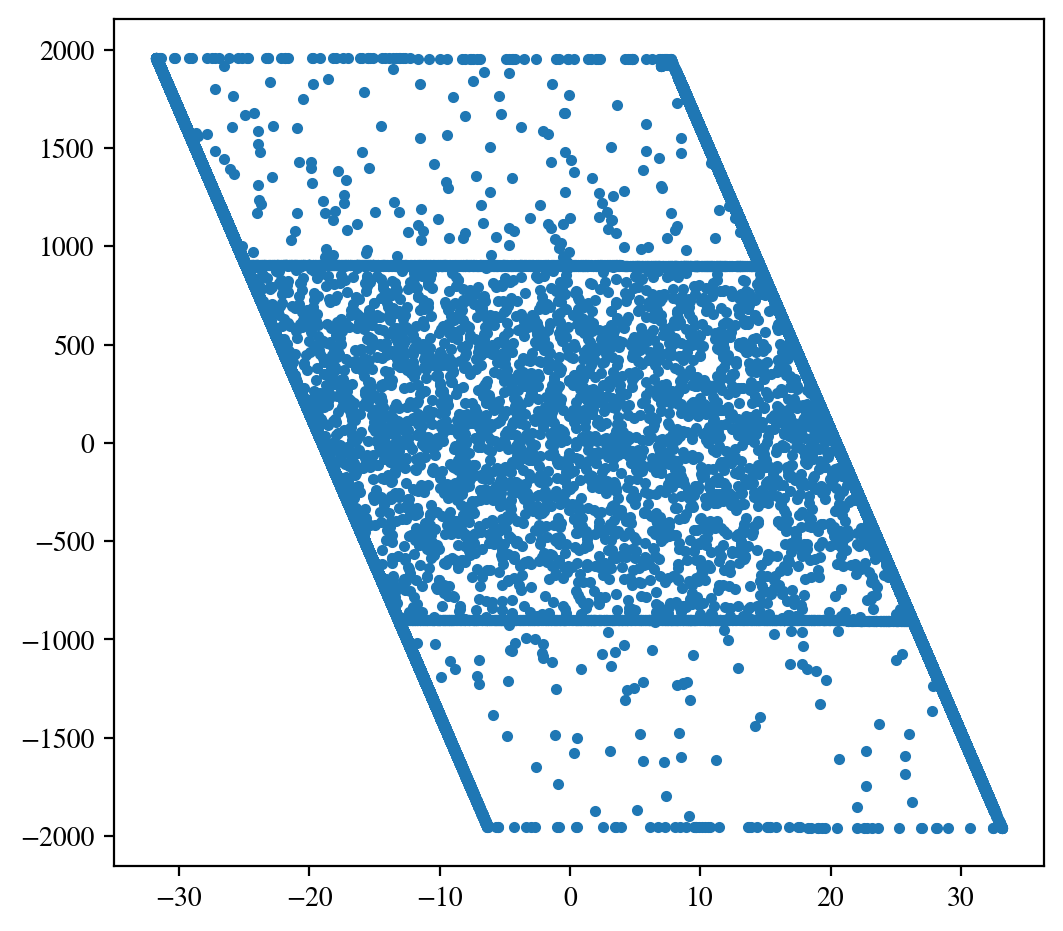

In [257]:
plt.plot(xc, zc, '.')

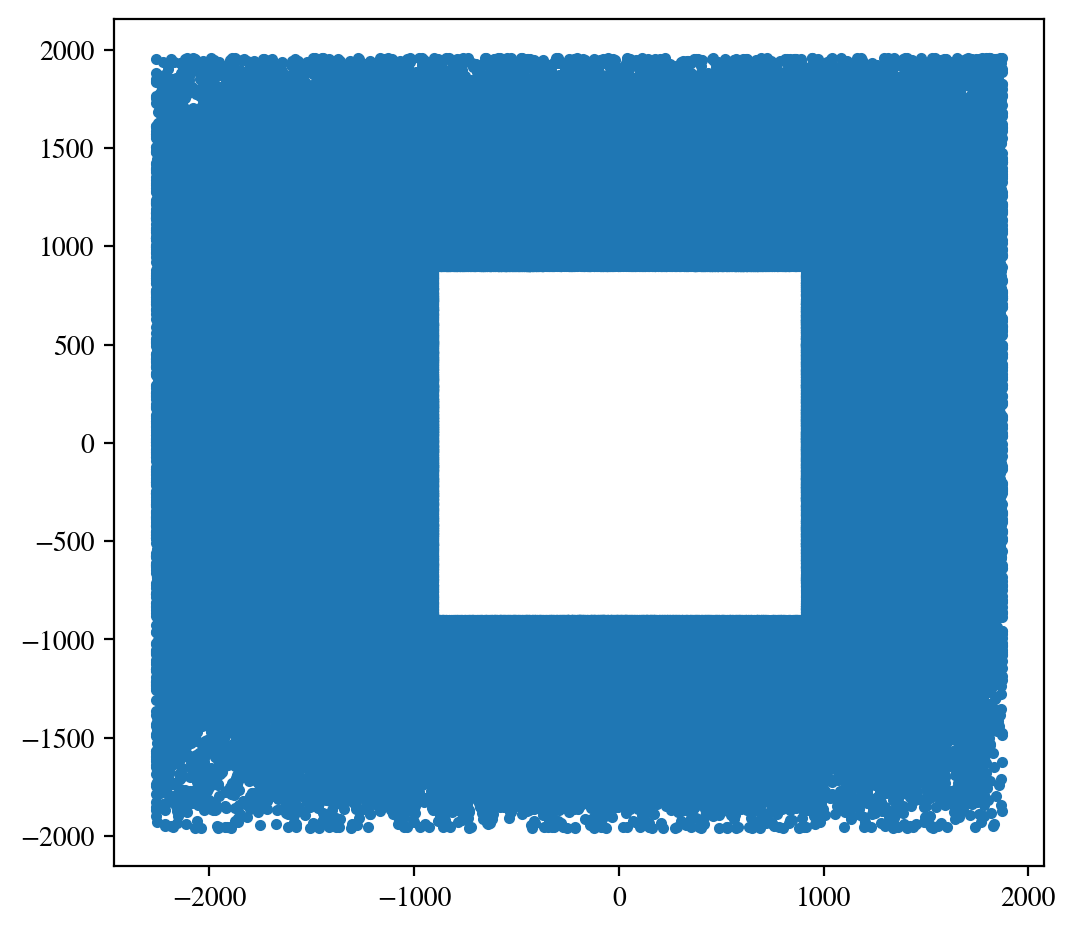

In [ ]:
plt.plot(yc, zc, '.')

In [ ]:
# plt.hist(HitX, bins=100, histtype='step')


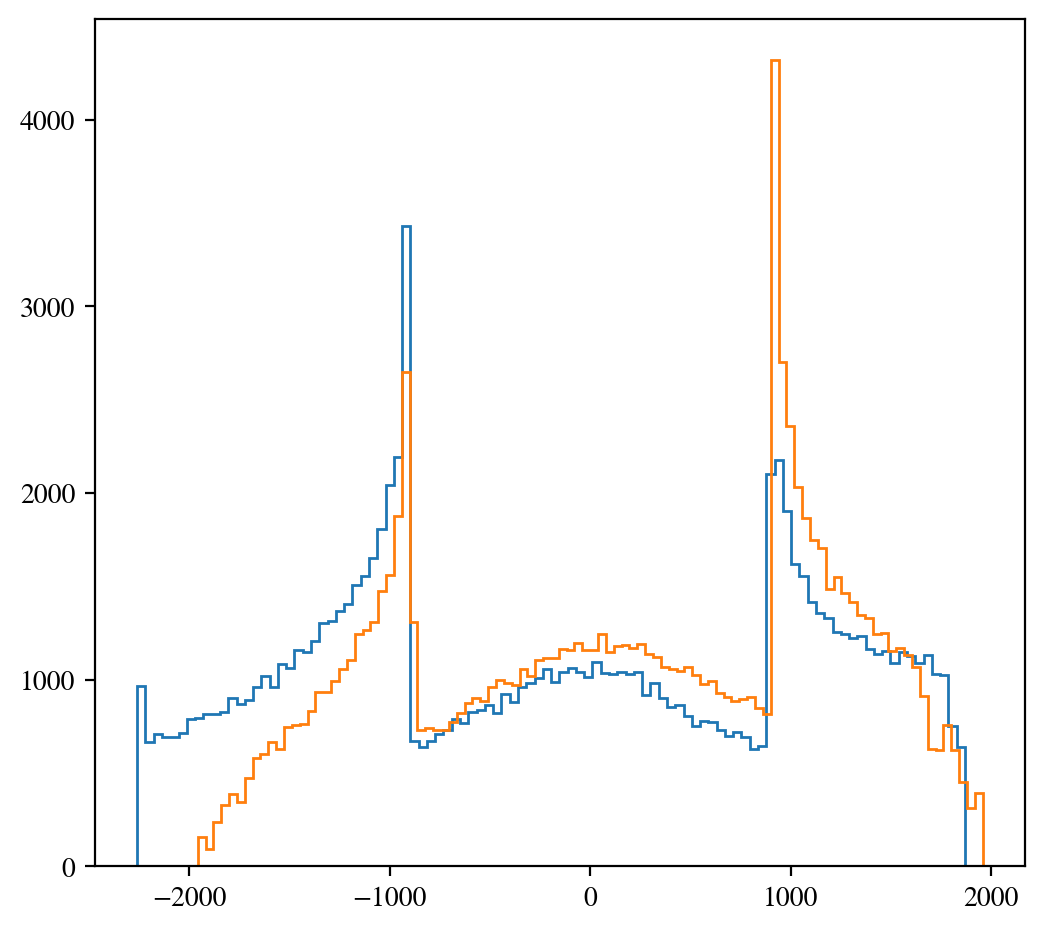

In [68]:
# plt.hist(HitX, bins=100, histtype='step')
plt.hist(yc, bins=100, histtype='step')
plt.hist(zc, bins=100, histtype='step')

print("")
# plt.hist(xc)